In [15]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# An example of Wide Sense Stationary process that is not strictly stationary

### Create `num_realisations` realisations of the process

We are sampling `num_realisations` times form skewed normal distirbution. We pass time `k` as a parameter to the distribution and then normalise those samples using (theoretical) mean and variance for distirbution for this `k`. This way we get samples from distribution with 0 mean and variance 1, but further momoents (like skew) are varying.

In [16]:
num_realisations = 10000
ks = list(range(10))

steps = []
for k in ks:
    mean, var, skew, _ = ss.skewnorm.stats(k-5, moments='mvsk')
    steps.append((ss.skewnorm.rvs(k-5, size=num_realisations)-mean)/np.sqrt(var))
steps = np.array(steps)

### Histograms at each timestamp
You can observe that the mean and variance do not change much with "time" but the histograms look different

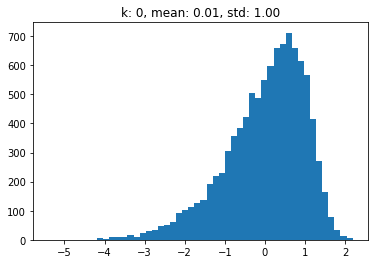

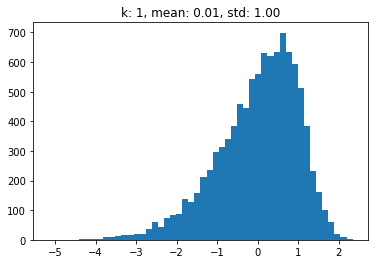

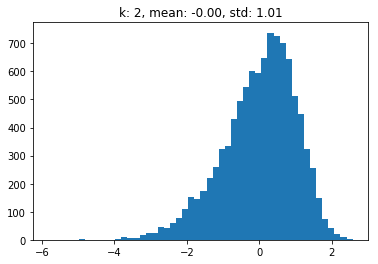

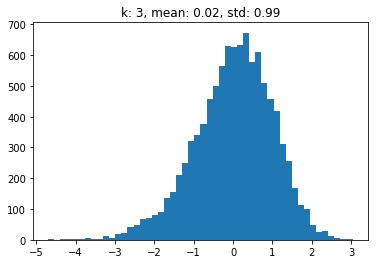

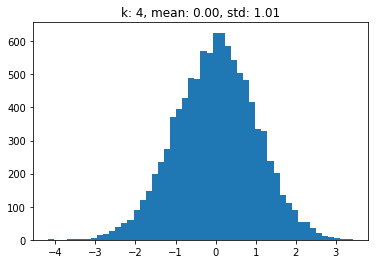

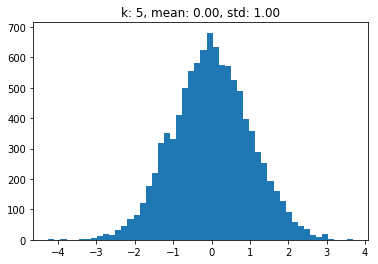

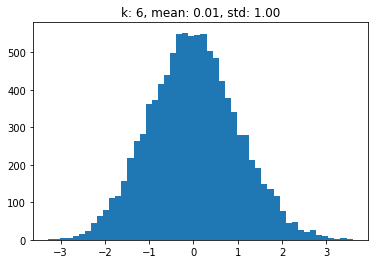

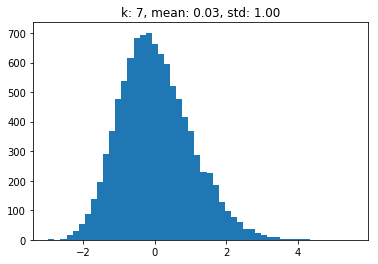

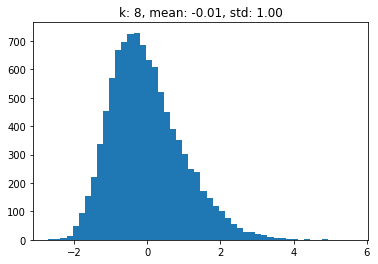

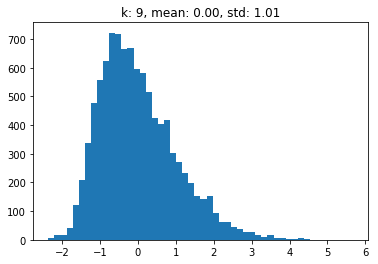

In [17]:
for k in ks:
    plt.figure()
    plt.hist(steps[k, :], 50)
    plt.title("k: {k}, mean: {mean:.2f}, std: {std:.2f}".format(k=k, mean=np.mean(steps[k, :]), std=np.std(steps[k,:])))
    plt.show()

### Empirical distributions using boxplot
Another way to look at the distributions is boxplot (right). It's sometimes more 
convenient than histogram. 
The orange horizontal lines in the middle are the medians, the boxes depicts the 
"middle" 50% of the distributions, the vertical lines cover most of the 
distribution and the dots depict "unlikely" points, outliers. You can see that 
those distributions change in time, and that the median and the main mass, that 
is middle 50% of the distribution does not move that much, but the placement of 
the outliers what matters. If you look closely you can see that the median moves 
slightly in the opposite direction that the outliers do. 

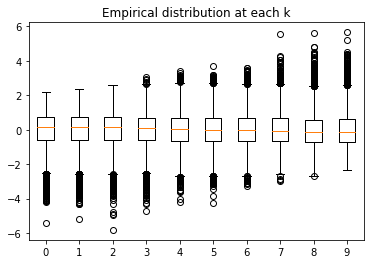

In [18]:
plt.boxplot(steps.T, labels=ks)
plt.title("Empirical distribution at each k")
plt.show()

### The realizations
If you look at just a few (for example 10) realizations of this process it's 
hard to judge if it a stationary (gaussian) noise, or if it is some more 
complicated distriburion. If you look at 500 realisations you can see some 
pattern emerge that distinguish the "past" and the "future" (negative and 
positive `k`).

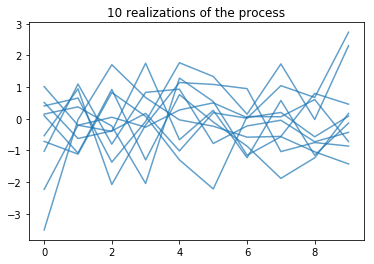

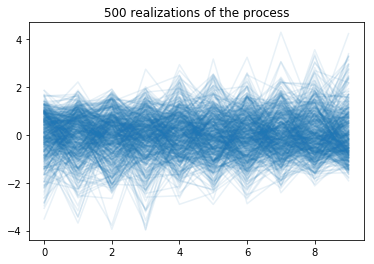

In [19]:
plt.plot(ks, steps[:,0:10], color='C0', alpha=0.7)
plt.title("10 realizations of the process")
plt.show()
plt.plot(ks, steps[:,0:500], color='C0', alpha=0.1)
plt.title("500 realizations of the process")
plt.show()